In [96]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
import pandas as pd
import re

In [2]:
# Model Opening
model_path = 'SIE'
model_ver = 'SIE_POS'

if 'POS+FLUX' in model_ver:
    constraint = 'pos_flux'
elif 'POS' in model_ver:
    constraint = 'pos'


# Load the data
with open(model_path + '/' + model_ver + '_optresult' + '.dat', 'r') as file:
    opt_result = file.readlines()

opt_result

with open(model_path + '/' + constraint + '_point' + '.py', 'r') as file:
    py = file.readlines()

py

['#!/usr/bin/env python\n',
 'import glafic\n',
 '\n',
 "glafic.init(0.3, 0.7, -1.0, 0.7, 'SIE/SIE_POS', 20.0, 20.0, 21.56, 21.56, 0.001, 0.001, 1, verb = 0)\n",
 '\n',
 "glafic.set_secondary('chi2_splane 0', verb = 0)\n",
 "glafic.set_secondary('chi2_checknimg 0', verb = 0)\n",
 "glafic.set_secondary('chi2_restart   -1', verb = 0)\n",
 "glafic.set_secondary('chi2_usemag    1', verb = 0)\n",
 "glafic.set_secondary('hvary          0', verb = 0)\n",
 "glafic.set_secondary('ran_seed -122000', verb = 0)\n",
 '\n',
 'glafic.startup_setnum(1, 0, 1)\n',
 "glafic.set_lens(1, 'sie', 0.261343256161012, 1.58e+02, 20.80, 20.75, 0.12, -4.0, 0.0, 0.0)\n",
 'glafic.set_point(1, 1.0, 20.78, 20.78)\n',
 '\n',
 'glafic.setopt_lens(1, 0, 1, 1, 1, 1, 1, 0, 0)\n',
 'glafic.setopt_point(1, 0, 1, 1)\n',
 '\n',
 '# model_init needs to be done again whenever model parameters are changed\n',
 'glafic.model_init(verb = 0)\n',
 '\n',
 "glafic.readobs_point('/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Len

In [3]:
# Extract the line containing 'glafic.startup_setnum('
startup_setnum_line = next(line for line in py if 'glafic.startup_setnum(' in line)

set_point_line = next(line for line in py if 'glafic.set_point(' in line)

# Extract the first number inside the parentheses
extracted_value = int(re.search(r'glafic\.startup_setnum\((\d+)', startup_setnum_line).group(1))

print(extracted_value)

set_point = int(re.search(r'glafic\.set_point\((\d+)', set_point_line).group(1))

print(set_point)

1
1


In [81]:
# Model Values 
# Find the line containing 'lens   sie' in opt_result
lens_sie_line = next(line for line in reversed(opt_result) if 'lens   sie' in line)

print(lens_sie_line)

# Extract the values from the line
lens_sie_values = lens_sie_line.split()[2:]
lens_sie_values = [str(value) for value in lens_sie_values]
lens_sie_values

# Find the line containing 'glafic.set_point' in opt_result
set_point_line = next(line for line in reversed(opt_result) if 'point' in line)

print(set_point_line)

# Extract the values from the line
set_point_values = set_point_line.split()[1:]
set_point_values = [str(value) for value in set_point_values]
set_point_values


lens   sie     0.2613  1.580350e+02  2.080960e+01  2.075891e+01  1.287589e-01 -4.437098e+00  0.000000e+00  0.000000e+00 

point  1.0000  2.081270e+01  2.078004e+01 



['1.0000', '2.081270e+01', '2.078004e+01']

In [102]:
r1 = 0.03
r2 = 1.0
n = 1000
len_num = 1

# Read the existing file contents
with open('kappa_glafic.py', 'r') as f:
    py = f.readlines()

# Update values and write back
with open('kappa_glafic.py', 'w') as glafic_file:
    for line in py:
        if 'glafic.set_lens(' in line:
            print('Found glafic.set_lens')
            line = f"glafic.set_lens(1, 'sie', {lens_sie_values[0]}, {lens_sie_values[1]}, {lens_sie_values[2]}, {lens_sie_values[3]}, {lens_sie_values[4]}, {lens_sie_values[5]}, {lens_sie_values[6]}, {lens_sie_values[7]})\n"
        elif 'glafic.set_point(' in line:
            print('Found glafic.set_point')
            # Ensure values are up to date
            if set_point_values is not None and len(set_point_values) == 3:
                line = f"glafic.set_point(1, 1.000, {set_point_values[0]}, {set_point_values[1]})\n"
            else:
                print("set_point_values is not set correctly.")
        elif 'glafic.kapparad(' in line:
            print('Found glafic.kapparad')
            line = f"glafic.kapparad({set_point_values[0]}, {set_point_values[1]}, {set_point_values[2]}, {r1}, {r2}, {n}, {len_num})\n"
        elif 'glafic.kappacum(' in line:
            print('Found glafic.kappacum')
            line = f"glafic.kappacum({set_point_values[0]}, {set_point_values[1]}, {set_point_values[2]}, {r1}, {r2}, {n}, {len_num})\n"
        glafic_file.write(line)

Found glafic.set_lens
Found glafic.set_point
Found glafic.kapparad
Found glafic.kappacum


In [103]:
%run kappa_glafic.py

######## computing radial profile of kappa
 zs = 1.000000e+00,  lens id = 1,  step = 1000
 center = (2.081270e+01, 2.078004e+01),  range = [3.000000e-02, 1.000000e+00]
 output file name = SIE/SIE_POS_kaprad.dat

3.000000e-02 9.624356e+00
3.097000e-02 9.197390e+00
3.194000e-02 8.813617e+00
3.291000e-02 8.466486e+00
3.388000e-02 8.149954e+00
3.485000e-02 7.859641e+00
3.582000e-02 7.594142e+00
3.679000e-02 7.345905e+00
3.776000e-02 7.115292e+00
3.873000e-02 6.900292e+00
3.970000e-02 6.699218e+00
4.067000e-02 6.510635e+00
4.164000e-02 6.333313e+00
4.261000e-02 6.166193e+00
4.358000e-02 6.008351e+00
4.455000e-02 5.858981e+00
4.552000e-02 5.717371e+00
4.649000e-02 5.582893e+00
4.746000e-02 5.454989e+00
4.843000e-02 5.333160e+00
4.940000e-02 5.216960e+00
5.037000e-02 5.105985e+00
5.134000e-02 4.999875e+00
5.231000e-02 4.898300e+00
5.328000e-02 4.800962e+00
5.425000e-02 4.707590e+00
5.522000e-02 4.617936e+00
5.619000e-02 4.531773e+00
5.716000e-02 4.448894e+00
5.813000e-02 4.369106e+00
5.910000

41700e-01 8.584366e-01
5.751400e-01 8.571862e-01
5.761100e-01 8.559452e-01
5.770800e-01 8.547138e-01
5.780500e-01 8.534922e-01
5.790200e-01 8.522807e-01
5.799900e-01 8.510797e-01
5.809600e-01 8.498894e-01
5.819300e-01 8.487103e-01
5.829000e-01 8.475414e-01
5.838700e-01 8.463855e-01
5.848400e-01 8.452422e-01
5.858100e-01 8.441119e-01
5.867800e-01 8.429952e-01
5.877500e-01 8.418929e-01
5.887200e-01 8.408058e-01
5.896900e-01 8.397348e-01
5.906600e-01 8.386809e-01
5.916300e-01 8.376453e-01
5.926000e-01 8.366294e-01
5.935700e-01 8.356348e-01
5.945400e-01 8.346634e-01
5.955100e-01 8.337173e-01
5.964800e-01 8.327993e-01
5.974500e-01 8.319124e-01
5.984200e-01 8.310606e-01
5.993900e-01 8.302486e-01
6.003600e-01 8.294823e-01
6.013300e-01 8.287693e-01
6.023000e-01 8.281143e-01
6.032700e-01 8.275390e-01
6.042400e-01 8.270575e-01
6.052100e-01 8.266959e-01
6.061800e-01 8.264931e-01
6.071500e-01 8.265053e-01
6.081200e-01 8.268485e-01
6.090900e-01 8.277395e-01
6.100600e-01 8.297736e-01
6.110300e-01 8.

In [109]:
# Math for img positions 
x_cent = float(set_point_values[1])
y_cent = float(set_point_values[2])
print(x_cent, y_cent)

# Predicted Positions 
pred_columns = ['x', 'y', 'mag', 'err']
pred_file = model_path + '/' + model_ver + '_point.dat'
pred = pd.read_csv(pred_file, sep=' ', header=None, skiprows=1, names=pred_columns)
pred


20.8127 20.78004


x   y    mag  \
NaN NaN 20.7644 NaN NaN 20.3032 NaN NaN      -6.7047  NaN NaN NaN    NaN   
        21.2760 NaN NaN 20.9607 NaN NaN       13.6533 NaN NaN NaN    NaN   
        20.3933 NaN NaN 21.0459 NaN NaN       15.5092 NaN NaN NaN    NaN   
        20.8199 NaN NaN 21.2593 NaN -19.6522 NaN      NaN NaN NaN  0.168   

                                                             err  
NaN NaN 20.7644 NaN NaN 20.3032 NaN NaN      -6.7047  NaN  1.049  
        21.2760 NaN NaN 20.9607 NaN NaN       13.6533 NaN  0.000  
        20.3933 NaN NaN 21.0459 NaN NaN       15.5092 NaN  0.056  
        20.8199 NaN NaN 21.2593 NaN -19.6522 NaN      NaN    NaN

In [104]:
# Plot profile 
# Load the data
columns = ['r', 'kappa']
data = pd.read_csv( model_path + '/' + model_ver + '_kaprad.dat', sep=' ', header=None, names=columns)
data2 = pd.read_csv(model_path + '/' + model_ver + '_kapcum.dat', sep=' ', header=None, names=columns)

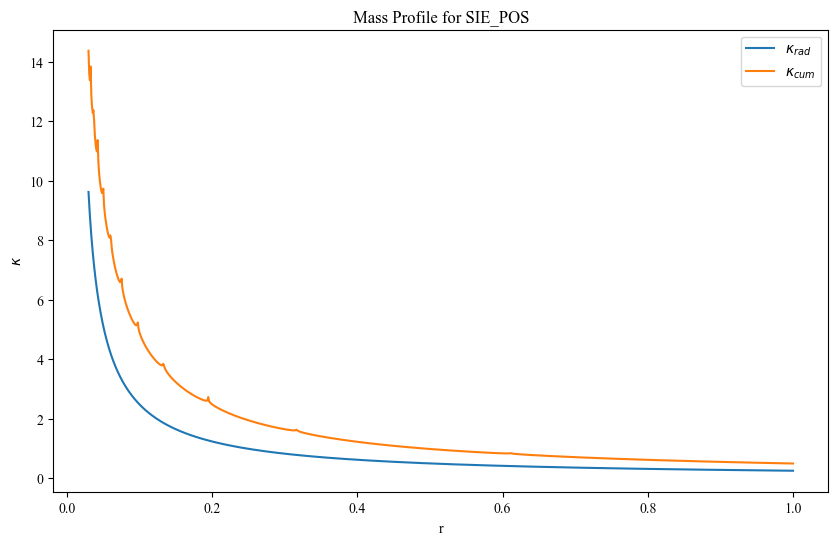

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(data['r'], data['kappa'], label = '$\kappa _{rad}$')
plt.plot(data2['r'], data2['kappa'], label = '$\kappa _{cum}$')
plt.xlabel('r')
plt.ylabel('$\kappa$')
plt.title('Mass Profile for ' + model_ver)
plt.legend()
plt.show()